In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

# Preprocessing

In [3]:
# df = pd.read_csv("NSL_KDD_Train.csv")
train_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Train.csv'
test_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Test.csv'

In [4]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]


df_train = pd.read_csv(train_url,header=None, names = col_names)

df_test = pd.read_csv(test_url, header=None, names = col_names)

print('Dimensions of the Training set:',df_train.shape)
print('Dimensions of the Test set:',df_test.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


### Combine the train and test dataset

In [5]:
df = pd.concat([df_train,df_test])

In [6]:
print(f"Dimentions of complete dataframe : {df.shape}")

Dimentions of complete dataframe : (148517, 42)


In [7]:
pd.options.display.max_rows = 999999
pd.options.display.max_columns = 500
pd.options.display.max_colwidth=1000

In [8]:
df.head(10)

duration protocol_type     service flag  src_bytes  dst_bytes  land  \
0         0           tcp    ftp_data   SF        491          0     0   
1         0           udp       other   SF        146          0     0   
2         0           tcp     private   S0          0          0     0   
3         0           tcp        http   SF        232       8153     0   
4         0           tcp        http   SF        199        420     0   
5         0           tcp     private  REJ          0          0     0   
6         0           tcp     private   S0          0          0     0   
7         0           tcp     private   S0          0          0     0   
8         0           tcp  remote_job   S0          0          0     0   
9         0           tcp     private   S0          0          0     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   
4               0       0    0                  0          1                0   
5               0       0    0                  0          0                0   
6               0       0    0                  0          0                0   
7               0       0    0                  0          0                0   
8               0       0    0                  0          0                0   
9               0       0    0                  0          0                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0             0         0                   0           0   
3           0             0         0                   0           0   
4           0             0         0                   0           0   
5           0             0         0                   0           0   
6           0             0         0                   0           0   
7           0             0         0                   0           0   
8           0             0         0                   0           0   
9           0             0         0                   0           0   

   num_access_files  num_outbound_cmds  is_host_login  is_guest_login  count  \
0                 0                  0              0               0      2   
1                 0                  0              0               0     13   
2                 0                  0              0               0    123   
3                 0                  0              0               0      5   
4                 0                  0              0               0     30   
5                 0                  0              0               0    121   
6                 0                  0              0               0    166   
7                 0                  0              0               0    117   
8                 0                  0              0               0    270   
9                 0                  0              0               0    133   

   srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  \
0          2          0.0              0.0          0.0              0.0   
1          1          0.0              0.0          0.0              0.0   
2          6          1.0              1.0          0.0              0.0   
3          5          0.2              0.2          0.0              0.0   
4         32          0.0              0.0          0.0              0.0   
5         19          0.0              0.0          1.0              1.0   
6          9          1.0              1.0          0.0              0.0   
7  

In [9]:
# df.to_csv("NSL_KDD.csv")

### List of distinct labels


In [10]:
label_unique = df["label"].unique()
protocol_type_unique = df["protocol_type"].unique()
service_unique = df["service"].unique()
flag_unique = df["flag"].unique()

In [11]:
label_unique

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

### Network Traffic Attack Types in NSL KDD Dataset:

**Probes:**

* **neptune, ipsweep, portsweep, nmap, satan:** These attacks aim to gather information about a network and its vulnerabilities. They scan for active hosts, open ports, and running services.
* **teardrop, smurf, pod:** These are more complex probes that exploit specific network protocol vulnerabilities to crash or overwhelm devices.

**Denial-of-Service (DoS):**

* **warezclient, warezmaster, phf, land, loadmodule:** These attacks aim to disrupt services by flooding the target with excessive traffic, consuming resources, and rendering it unavailable.

**User to Root (U2R):**

* **guess_passwd, ftp_write, multihop, rootkit:** These attacks exploit vulnerabilities in applications or protocols to gain unauthorized access and escalate privileges to root (super user) level.

**Remote to Local (R2L):**

* **back, imap, buffer_overflow, perl:** These attacks target specific user accounts or services to gain unauthorized access from a remote location.




In [12]:
protocol_type_unique

array(['tcp', 'udp', 'icmp'], dtype=object)

In [13]:
service_unique

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [14]:
flag_unique

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

### Instead of one hot encoding we will try label encoding to convert the categorical values to numerical ones.

In [15]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['protocol_type', 'service', 'flag']

label_encoder = LabelEncoder()

for i in categorical_columns:
  df[i]= label_encoder.fit_transform(df[i])


In [16]:
df.head(10)

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       20     9        491          0     0   
1         0              2       44     9        146          0     0   
2         0              1       49     5          0          0     0   
3         0              1       24     9        232       8153     0   
4         0              1       24     9        199        420     0   
5         0              1       49     1          0          0     0   
6         0              1       49     5          0          0     0   
7         0              1       49     5          0          0     0   
8         0              1       51     5          0          0     0   
9         0              1       49     5          0          0     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   
4               0       0    0                  0          1                0   
5               0       0    0                  0          0                0   
6               0       0    0                  0          0                0   
7               0       0    0                  0          0                0   
8               0       0    0                  0          0                0   
9               0       0    0                  0          0                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0             0         0                   0           0   
3           0             0         0                   0           0   
4           0             0         0                   0           0   
5           0             0         0                   0           0   
6           0             0         0                   0           0   
7           0             0         0                   0           0   
8           0             0         0                   0           0   
9           0             0         0                   0           0   

   num_access_files  num_outbound_cmds  is_host_login  is_guest_login  count  \
0                 0                  0              0               0      2   
1                 0                  0              0               0     13   
2                 0                  0              0               0    123   
3                 0                  0              0               0      5   
4                 0                  0              0               0     30   
5                 0                  0              0               0    121   
6                 0                  0              0               0    166   
7                 0                  0              0               0    117   
8                 0                  0              0               0    270   
9                 0                  0              0               0    133   

   srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  \
0          2          0.0              0.0          0.0              0.0   
1          1          0.0              0.0          0.0              0.0   
2          6          1.0              1.0          0.0              0.0   
3          5          0.2              0.2          0.0              0.0   
4         32          0.0              0.0          0.0              0.0   
5         19          0.0              0.0          1.0              1.0   
6          9          1.0              1.0          0.0              0.0   
7         16  

### Scaling numericals values

In [17]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ["duration","src_bytes", "dst_bytes","protocol_type", "service", "flag", "urgent", "hot", "num_failed_logins","num_compromised","su_attempted", "num_root" ,"num_file_creations" ,"num_shells","num_access_files","count","srv_count","dst_host_count", "dst_host_srv_count"]

min_max_scaler = MinMaxScaler()
df[columns_to_scale] = min_max_scaler.fit_transform(df[columns_to_scale])

In [18]:
df_preprocessed = df.copy()

In [19]:
df_preprocessed.shape

(148517, 42)

In [20]:
df_preprocessed.head(3)

duration  protocol_type   service  flag     src_bytes  dst_bytes  land  \
0       0.0            0.5  0.289855   0.9  3.558064e-07        0.0     0   
1       0.0            1.0  0.637681   0.9  1.057999e-07        0.0     0   
2       0.0            0.5  0.710145   0.5  0.000000e+00        0.0     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0     0.0  0.0                0.0          0              0.0   
1               0     0.0  0.0                0.0          0              0.0   
2               0     0.0  0.0                0.0          0              0.0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0           0.0       0.0                 0.0         0.0   
1           0           0.0       0.0                 0.0         0.0   
2           0           0.0       0.0                 0.0         0.0   

   num_access_files  num_outbound_cmds  is_host_login  is_guest_login  \
0               0.0                  0              0               0   
1               0.0                  0              0               0   
2               0.0                  0              0               0   

      count  srv_count  serror_rate  srv_serror_rate  rerror_rate  \
0  0.003914   0.003914          0.0              0.0          0.0   
1  0.025440   0.001957          0.0              0.0          0.0   
2  0.240705   0.011742          1.0              1.0          0.0   

   srv_rerror_rate  same_srv_rate  diff_srv_rate  srv_diff_host_rate  \
0              0.0           1.00           0.00                 0.0   
1              0.0           0.08           0.15                 0.0   
2              0.0           0.05           0.07                 0.0   

   dst_host_count  dst_host_srv_count  dst_host_same_srv_rate  \
0        0.588235            0.098039                    0.17   
1        1.000000            0.003922                    0.00   
2        1.000000            0.101961                    0.10   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                          0.0                   0.0   
1                          0.0                   0.0   
2                          0.0                   1.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                  0.05                       0.0   
1                       0.0                  0.00                       0.0   
2                       1.0                  0.00                       0.0   

     label  
0   normal  
1   normal  
2  neptune

In [21]:
df_preprocessed_corr = df_preprocessed.copy()

In [22]:
target = []
for i in df_preprocessed_corr["label"]:
  if i == "normal":
    target += [1]
  else :
    target += [0]
df_preprocessed_corr["label"] = np.array(target)

In [23]:
df_preprocessed_corr.head(20)

duration  protocol_type   service  flag     src_bytes     dst_bytes  land  \
0        0.0            0.5  0.289855   0.9  3.558064e-07  0.000000e+00     0   
1        0.0            1.0  0.637681   0.9  1.057999e-07  0.000000e+00     0   
2        0.0            0.5  0.710145   0.5  0.000000e+00  0.000000e+00     0   
3        0.0            0.5  0.347826   0.9  1.681203e-07  6.223962e-06     0   
4        0.0            0.5  0.347826   0.9  1.442067e-07  3.206260e-07     0   
5        0.0            0.5  0.710145   0.1  0.000000e+00  0.000000e+00     0   
6        0.0            0.5  0.710145   0.5  0.000000e+00  0.000000e+00     0   
7        0.0            0.5  0.710145   0.5  0.000000e+00  0.000000e+00     0   
8        0.0            0.5  0.739130   0.5  0.000000e+00  0.000000e+00     0   
9        0.0            0.5  0.710145   0.5  0.000000e+00  0.000000e+00     0   
10       0.0            0.5  0.710145   0.1  0.000000e+00  0.000000e+00     0   
11       0.0            0.5  0.710145   0.5  0.000000e+00  0.000000e+00     0   
12       0.0            0.5  0.347826   0.9  2.079765e-07  1.718403e-06     0   
13       0.0            0.5  0.289855   0.9  2.420353e-07  0.000000e+00     0   
14       0.0            0.5  0.521739   0.5  0.000000e+00  0.000000e+00     0   
15       0.0            0.5  0.550725   0.5  0.000000e+00  0.000000e+00     0   
16       0.0            0.5  0.347826   0.9  2.173970e-07  1.052569e-05     0   
17       0.0            0.0  0.202899   0.9  1.304382e-08  0.000000e+00     0   
18       0.0            0.5  0.347826   0.9  1.688450e-07  4.702515e-07     0   
19       0.0            0.5  0.347826   0.9  2.485572e-07  8.992796e-07     0   

    wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
0                0     0.0  0.0                0.0          0   
1                0     0.0  0.0                0.0          0   
2                0     0.0  0.0                0.0          0   
3                0     0.0  0.0                0.0          1   
4                0     0.0  0.0                0.0          1   
5                0     0.0  0.0                0.0          0   
6                0     0.0  0.0                0.0          0   
7                0     0.0  0.0                0.0          0   
8                0     0.0  0.0                0.0          0   
9                0     0.0  0.0                0.0          0   
10               0     0.0  0.0                0.0          0   
11               0     0.0  0.0                0.0          0   
12               0     0.0  0.0                0.0          1   
13               0     0.0  0.0                0.0          1   
14               0     0.0  0.0                0.0          0   
15               0     0.0  0.0                0.0          0   
16               0     0.0  0.0                0.0          1   
17               0     0.0  0.0                0.0          0   
18               0     0.0  0.0                0.0          1   
19               0     0.0  0.0                0.0          1   

    num_compromised  root_shell  su_attempted  num_root  num_file_creations  \
0               0.0           0           0.0       0.0                 0.0   
1               0.0           0           0.0       0.0                 0.0   
2               0.0           0           0.0       0.0                 0.0   
3               0.0           0           0.0       0.0                 0.0   
4               0.0           0           0.0       0.0                 0.0   
5               0.0           0           0.0       0.0                 0.0   
6               0.0           0           0.0       0.0                 0.0   
7               0.0           0           0.0       0.0                 0.0   
8               0.0           0           0.0       0.0                 0.0   
9               0.0           0           0.0       0.0                 0.0   
10              0.0           0           0.0       0.0            

### Finding importance of each feature

In [24]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# correlation_matrix = df_preprocessed_corr.corr()

# plt.figure(figsize=(100, 100))

# heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10)
# heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)

# plt.title("Correlation Matrix", fontsize=16)

# plt.show()

In [25]:
# correlation_matrix = df_preprocessed_corr.corr()
# correlation_matrix

# label_correlations = correlation_matrix['label'].sort_values(ascending=False)

# print(f"Correlation with label (target attribute)\n: {label_correlations}")


### Attributes with high positive correlation with label
* same_srv_rate                  = 0.708911
* dst_host_srv_count             = 0.692577
* dst_host_same_srv_rate         = 0.667624
* logged_in                      = 0.664117
* flag                           = 0.629556


### Attributes with high negative correlation with label
* count                      =    -0.524108
* srv_serror_rate            =    -0.586636
* serror_rate                =    -0.588474
* dst_host_serror_rate       =    -0.589936
* dst_host_srv_serror_rate   =    -0.593690

#### num_outbound_cmds has a correlation value of NaN it may indicate the standard deviation is 0 ie the value remains constant for all data points. Hence its best to remove it from the dataframe

In [26]:
df_preprocessed_corr['num_outbound_cmds'].unique()

array([0])

### Feature importance

In [27]:
# from sklearn.ensemble import RandomForestClassifier

# X = df_preprocessed_corr.drop('label', axis=1)
# y = df_preprocessed_corr['label']

# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X, y)

# feature_importances = pd.Series(model.feature_importances_, index=X.columns)
# feature_importances.nlargest(10).plot(kind='barh')
# plt.title('Top 10 Feature Importances')
# plt.show()

### Normal and Anomalous traffic data after preprocessing

In [28]:
normal_traffic_preprocessed = df_preprocessed[df_preprocessed["label"]=="normal"]
anomalous_traffic_preprocessed = df_preprocessed[df_preprocessed["label"]!="normal"]

In [29]:
normal_traffic_preprocessed.head(10)

duration  protocol_type   service  flag     src_bytes     dst_bytes  land  \
0    0.00000            0.5  0.289855   0.9  3.558064e-07  0.000000e+00     0   
1    0.00000            1.0  0.637681   0.9  1.057999e-07  0.000000e+00     0   
3    0.00000            0.5  0.347826   0.9  1.681203e-07  6.223962e-06     0   
4    0.00000            0.5  0.347826   0.9  1.442067e-07  3.206260e-07     0   
12   0.00000            0.5  0.347826   0.9  2.079765e-07  1.718403e-06     0   
16   0.00000            0.5  0.347826   0.9  2.173970e-07  1.052569e-05     0   
18   0.00000            0.5  0.347826   0.9  1.688450e-07  4.702515e-07     0   
19   0.00000            0.5  0.347826   0.9  2.485572e-07  8.992796e-07     0   
22   0.00000            0.5  0.347826   0.9  1.833381e-07  9.088221e-06     0   
23   0.09715            1.0  0.637681   0.9  1.065245e-07  8.015650e-08     0   

    wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
0                0     0.0  0.0                0.0          0   
1                0     0.0  0.0                0.0          0   
3                0     0.0  0.0                0.0          1   
4                0     0.0  0.0                0.0          1   
12               0     0.0  0.0                0.0          1   
16               0     0.0  0.0                0.0          1   
18               0     0.0  0.0                0.0          1   
19               0     0.0  0.0                0.0          1   
22               0     0.0  0.0                0.0          1   
23               0     0.0  0.0                0.0          0   

    num_compromised  root_shell  su_attempted  num_root  num_file_creations  \
0               0.0           0           0.0       0.0                 0.0   
1               0.0           0           0.0       0.0                 0.0   
3               0.0           0           0.0       0.0                 0.0   
4               0.0           0           0.0       0.0                 0.0   
12              0.0           0           0.0       0.0                 0.0   
16              0.0           0           0.0       0.0                 0.0   
18              0.0           0           0.0       0.0                 0.0   
19              0.0           0           0.0       0.0                 0.0   
22              0.0           0           0.0       0.0                 0.0   
23              0.0           0           0.0       0.0                 0.0   

    num_shells  num_access_files  num_outbound_cmds  is_host_login  \
0          0.0               0.0                  0              0   
1          0.0               0.0                  0              0   
3          0.0               0.0                  0              0   
4          0.0               0.0                  0              0   
12         0.0               0.0                  0              0   
16         0.0               0.0                  0              0   
18         0.0               0.0                  0              0   
19         0.0               0.0                  0              0   
22         0.0               0.0                  0              0   
23         0.0               0.0                  0              0   

    is_guest_login     count  srv_count  serror_rate  srv_serror_rate  \
0                0  0.003914   0.003914          0.0             0.00   
1                0  0.025440   0.001957          0.0             0.00   
3                0  0.009785   0.009785          0.2             0.20   
4                0  0.058708   0.062622          0.0             0.00   
12               0  0.005871   0.013699          0.0             0.00   
16               0  0.015656   0.017613          0.0             0.11   
18               0  0.005871   0.005871          0.0             0.00   
19               0  0.017613   0.019569          0.0             0.00   
22               0  0.015656   0.019569          0.0             0.00   
23               0  0.001

In [30]:
normal_traffic_preprocessed.shape

(77054, 42)

In [31]:
preprocessed_columns = normal_traffic_preprocessed.columns

In [32]:
anomalous_traffic_preprocessed.head(10)

duration  protocol_type   service  flag     src_bytes  dst_bytes  land  \
2        0.0            0.5  0.710145   0.5  0.000000e+00        0.0     0   
5        0.0            0.5  0.710145   0.1  0.000000e+00        0.0     0   
6        0.0            0.5  0.710145   0.5  0.000000e+00        0.0     0   
7        0.0            0.5  0.710145   0.5  0.000000e+00        0.0     0   
8        0.0            0.5  0.739130   0.5  0.000000e+00        0.0     0   
9        0.0            0.5  0.710145   0.5  0.000000e+00        0.0     0   
10       0.0            0.5  0.710145   0.1  0.000000e+00        0.0     0   
11       0.0            0.5  0.710145   0.5  0.000000e+00        0.0     0   
13       0.0            0.5  0.289855   0.9  2.420353e-07        0.0     0   
14       0.0            0.5  0.521739   0.5  0.000000e+00        0.0     0   

    wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
2                0     0.0  0.0                0.0          0   
5                0     0.0  0.0                0.0          0   
6                0     0.0  0.0                0.0          0   
7                0     0.0  0.0                0.0          0   
8                0     0.0  0.0                0.0          0   
9                0     0.0  0.0                0.0          0   
10               0     0.0  0.0                0.0          0   
11               0     0.0  0.0                0.0          0   
13               0     0.0  0.0                0.0          1   
14               0     0.0  0.0                0.0          0   

    num_compromised  root_shell  su_attempted  num_root  num_file_creations  \
2               0.0           0           0.0       0.0                 0.0   
5               0.0           0           0.0       0.0                 0.0   
6               0.0           0           0.0       0.0                 0.0   
7               0.0           0           0.0       0.0                 0.0   
8               0.0           0           0.0       0.0                 0.0   
9               0.0           0           0.0       0.0                 0.0   
10              0.0           0           0.0       0.0                 0.0   
11              0.0           0           0.0       0.0                 0.0   
13              0.0           0           0.0       0.0                 0.0   
14              0.0           0           0.0       0.0                 0.0   

    num_shells  num_access_files  num_outbound_cmds  is_host_login  \
2          0.0               0.0                  0              0   
5          0.0               0.0                  0              0   
6          0.0               0.0                  0              0   
7          0.0               0.0                  0              0   
8          0.0               0.0                  0              0   
9          0.0               0.0                  0              0   
10         0.0               0.0                  0              0   
11         0.0               0.0                  0              0   
13         0.0               0.0                  0              0   
14         0.0               0.0                  0              0   

    is_guest_login     count  srv_count  serror_rate  srv_serror_rate  \
2                0  0.240705   0.011742          1.0              1.0   
5                0  0.236791   0.037182          0.0              0.0   
6                0  0.324853   0.017613          1.0              1.0   
7                0  0.228963   0.031311          1.0              1.0   
8                0  0.528376   0.045010          1.0              1.0   
9                0  0.260274   0.015656          1.0              1.0   
10               0  0.401174   0.023483          0.0              0.0   
11               0  0.389432   0.005871          1.0              1.0   
13               0  0.003914   0.003914          0.0              0.0   
14               0  0.455969   0.001957          1.0      

In [33]:
anomalous_traffic_preprocessed.shape

(71463, 42)

# Basic AutoEncoder model

In [34]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

def create_autoencoder(input_dim, encoding_dim):
  input_layer = Input(shape=(input_dim,))
  encoded = Dense(encoding_dim, activation="relu")(input_layer)
  decoded = Dense(input_dim, activation="sigmoid")(encoded)
  autoencoder = Model(inputs=input_layer,outputs=decoded)

  autoencoder.compile(optimizer="adam",loss="mean_squared_error")

  return autoencoder

In [35]:
normal_traffic_arr = normal_traffic_preprocessed.to_numpy()
anomalous_traffic_arr = anomalous_traffic_preprocessed.to_numpy()

In [36]:
train_arr = normal_traffic_arr[:-10000]
test_arr = np.concatenate((normal_traffic_arr[-10000:], anomalous_traffic_arr))

In [37]:
train_df = pd.DataFrame(train_arr)
test_df = pd.DataFrame(test_arr)
train_df.columns = preprocessed_columns
test_df.columns = preprocessed_columns

In [38]:
x_train = train_df.drop("label",axis=1)

In [39]:
x_train.head(5).shape

(5, 41)

In [40]:
x_train = np.array(x_train).astype("float32")

In [41]:

# input_dim = 41
# encoding_dim = 16
# autoencoder = create_autoencoder(input_dim, encoding_dim)
# autoencoder.fit(x_train,x_train, epochs=50, batch_size=128, shuffle=True, validation_split=0.2)

# ae_op = autoencoder.predict(x_train)
# reconstruction_loss = autoencoder.evaluate(ae_op ,x_train)
# print(reconstruction_loss)

In [42]:
# from keras.models import save_model

# autoencoder.save('autoencoder_model_01.h5')

In [43]:
from keras.models import load_model

# Load the model from the file
autoencoder = load_model('/content/drive/MyDrive/Colab Notebooks/models/autoencoder_model_01.h5')

In [44]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 41)]              0         
                                                                 
 dense_2 (Dense)             (None, 16)                672       
                                                                 
 dense_3 (Dense)             (None, 41)                697       
                                                                 
Total params: 1369 (5.35 KB)
Trainable params: 1369 (5.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


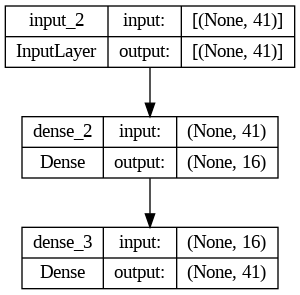

In [45]:
from keras.utils import plot_model

plot_model(autoencoder, to_file='autoencoder_visualization.png', show_shapes=True, show_layer_names=True)

In [46]:
normal_train_output = autoencoder.predict(x_train)

2096/2096 [==============================] - 3s 1ms/step


In [47]:
normal_train_output

array([[5.3901505e-03, 5.0202602e-01, 2.8216594e-01, ..., 3.6660801e-03,
        1.1459120e-02, 7.4593616e-03],
       [5.4557435e-02, 9.9218124e-01, 6.3993073e-01, ..., 1.5732537e-04,
        6.4810482e-04, 5.4995285e-04],
       [7.9256235e-05, 4.9785808e-01, 3.4592837e-01, ..., 2.1375827e-03,
        8.9238575e-03, 4.9290620e-03],
       ...,
       [8.2246428e-05, 5.0051248e-01, 3.4717134e-01, ..., 9.2110271e-04,
        1.0670557e-02, 7.9973713e-03],
       [5.0322508e-04, 5.0258905e-01, 3.4513521e-01, ..., 1.7521350e-04,
        9.7731012e-01, 9.2956465e-01],
       [4.1613754e-04, 9.9126023e-01, 1.7405978e-01, ..., 9.4554880e-06,
        3.6097327e-03, 3.2700901e-03]], dtype=float32)

### Calculating reconstruction loss of normal traffic data from train dataset

In [48]:
mse_normal_train = np.mean(np.power(x_train - normal_train_output, 2), axis=1)
np.average(mse_normal_train)

0.00034032998

### Testing the model

In [49]:
normal_test = test_df.loc[test_df["label"] == "normal"]
anomalous_test = test_df.loc[test_df["label"] != "normal"]

In [50]:
normal_test.shape

(10000, 42)

In [51]:
anomalous_test.shape

(71463, 42)

In [52]:
normal_test = normal_test.drop("label",axis=1)
anomalous_test = anomalous_test.drop("label",axis=1)

In [53]:
normal_test = np.array(normal_test).astype("float32")
anomalous_test = np.array(anomalous_test).astype("float32")

### Evaluating model on normal data from test dataset

In [54]:
normal_test_op = autoencoder.predict(normal_test)

313/313 [==============================] - 1s 2ms/step


### Calculating reconstruction loss of normal traffic data from test dataset

In [55]:
mse_normal_test = np.mean(np.power(normal_test - normal_test_op, 2), axis=1)
np.average(mse_normal_test)

0.0013048128

In [56]:
mse_normal_test

array([0.00045225, 0.00063797, 0.00014303, ..., 0.0002716 , 0.00025008,
       0.00028495], dtype=float32)

In [57]:
threshold = np.mean(mse_normal_train) + np.std(mse_normal_train)
print("Threshold: ", threshold)

Threshold:  0.0013215435


### Find how many normal traffic data from test dataset is classified as normal

In [58]:
normal_count=0
non_normal_count=0
for i in mse_normal_test:
  if i < threshold:
    normal_count+=1
  else:
    non_normal_count+=1
print(f"normal count : {normal_count}")
print(f"non normal count : {non_normal_count}")

normal count : 9336
non normal count : 664


### Calculating reconstruction loss of anomalous traffic data from test dataset

In [59]:
anomalous_test_op = autoencoder.predict(anomalous_test)

2234/2234 [==============================] - 6s 3ms/step


In [60]:
mse_anomalous_test = np.mean(np.power(anomalous_test - anomalous_test_op, 2), axis=1)
np.average(mse_anomalous_test)

# loss1 = tf.keras.losses.mae(anomalous_test_op,np.array(anomalous_test).astype("float32"))
# np.max(loss1)

0.015747564

### Find how many anomalous traffic data from test dataset is classified as normal

In [61]:
anomalous_count=0
non_anomalous_count=0
for i in mse_anomalous_test:
  if i > threshold:
    anomalous_count+=1
  else:
    non_anomalous_count+=1
print(f"anomalous count : {anomalous_count}")
print(f"non anomalous count : {non_anomalous_count}")

anomalous count : 60012
non anomalous count : 11451


### Find how many normal traffic data from train dataset is classified as normal

In [62]:
normal_train_count=0
non_normal_train_count=0
for i in mse_normal_train:
  if i < threshold:
    normal_train_count+=1
  else:
    non_normal_train_count+=1
print(f"normal train count : {normal_train_count}")
print(f"non normal train count : {non_normal_train_count}")

normal train count : 65370
non normal train count : 1684



* TP = 64300
* FN = 7163
* TN = 9124
* FP = 876

### Verifying evalutation metrics using code

In [63]:
target_test = []
for i in test_df["label"]:
  if i == "normal":
    target_test += [0]
  else:
    target_test += [1]

In [64]:
x_test = test_df.drop("label",axis=1)

In [65]:
x_test = np.array(x_test).astype("float32")

In [66]:
x_test_output = autoencoder.predict(x_test)

2546/2546 [==============================] - 3s 1ms/step


In [67]:
mse_test = np.mean(np.power(x_test - x_test_output, 2), axis=1)
np.average(mse_test)

0.0139746405

In [68]:
test_pred = []
for i in mse_test:
  if i > threshold:
    test_pred += [1]
  else:
    test_pred += [0]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(target_test, test_pred)

print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(target_test, test_pred))

Confusion Matrix:
[[ 9336   664]
 [11451 60012]]

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.93      0.61     10000
           1       0.99      0.84      0.91     71463

    accuracy                           0.85     81463
   macro avg       0.72      0.89      0.76     81463
weighted avg       0.92      0.85      0.87     81463



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

reconstructed_normal = autoencoder.predict(x_train)
reconstructed_anomalous = autoencoder.predict(anomalous_test)

normal_losses = np.mean(np.square(x_train - reconstructed_normal), axis=1)
anomalous_losses = np.mean(np.square(anomalous_test - reconstructed_anomalous), axis=1)

candidate_thresholds = np.linspace(0.00001, 0.01, num=500)

best_threshold = None
best_accuracy = 0
best_tp = 0
best_tn = 0
best_fp = 0
best_fn = 0


for threshold in candidate_thresholds:

    tp = np.sum(anomalous_losses > threshold)
    tn = np.sum(normal_losses <= threshold)
    fp = np.sum(normal_losses > threshold)
    fn = np.sum(anomalous_losses <= threshold)



    accuracy = (tp + tn) / (tp + tn + fp + fn)


    if accuracy > best_accuracy:
        best_threshold = threshold
        best_accuracy = accuracy
        best_tp = tp
        best_tn = tn
        best_fp = fp
        best_fn = fn


print("Best Threshold:", best_threshold)
print("True Positives (TP):", best_tp)
print("True Negatives (TN):", best_tn)
print("False Positives (FP):", best_fp)
print("False Negatives (FN):", best_fn)
print("Accuracy:", best_accuracy)

2234/2234 [==============================] - 3s 1ms/step
Best Threshold: 0.0011511422845691384
True Positives (TP): 60527
True Negatives (TN): 64938
False Positives (FP): 2116
False Negatives (FN): 10936
Accuracy: 0.9057732985842893


In [ ]:
import numpy as np
from scipy.stats import norm


mu, sigma = norm.fit(normal_losses)


percentile_threshold = norm.ppf(0.95, loc=mu, scale=sigma)

print("Percentile Threshold:", percentile_threshold)


Percentile Threshold: 0.0019542826032240526


In [ ]:
# fig, ax = plt.subplots(figsize=(4, 3))
# group_names = ["TN","FP","FN","TP"]
# group_counts = [f"{value:0.0f}" for value in cm.flatten()]
# # group_percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]
# labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
# labels = np.asarray(labels).reshape(2,2)
# sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [ ]:
len(x_train[0])

41

In [ ]:
from sklearn.cluster import KMeans
# inertias = []
# for i in range(1,11):
#     kmeans = KMeans(n_clusters=i)
#     kmeans.fit(x_train)
#     inertias.append(kmeans.inertia_)

# plt.plot(range(1,11), inertias, marker='o')
# plt.title('Elbow method')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.show()

In [ ]:
# kmeans = KMeans(n_clusters=4)

# y = kmeans.fit_predict(x_train)

# train_df['Cluster_4'] = y

In [ ]:
# train_df["Cluster_4"].value_counts()

In [ ]:
# kmeans = KMeans(n_clusters=5)

# y = kmeans.fit_predict(x_train)

# train_df['Cluster_5'] = y

# # train_df.head(10)

In [ ]:
# train_df["Cluster_5"].value_counts()

In [69]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)

y = kmeans.fit_predict(x_train)

train_df['Cluster_6'] = y

# train_df.head(10)
train_df["Cluster_6"].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster_6
1    20022
2    16433
4    11303
5     9429
0     6970
3     2897
Name: count, dtype: int64

Cluster_6
1    20022
2    16433
4    11303
5     9429
0     6970
3     2897
Name: count, dtype: int64

```
cluster no. = 0; no. of points = 6970
cluster no. = 1; no. of points = 20022
cluster no. = 2; no. of points = 16433
cluster no. = 3; no. of points = 2897
cluster no. = 4; no. of points = 11303
cluster no. = 5; no. of points = 9429


```

In [ ]:
# len(anomalous_test)

In [ ]:
# # kmeans.predict()
# single_data = np.array(x_train[0]).reshape(1,-1)
# kmeans.predict(single_data)

In [ ]:
# count=[0]*6
# for i in range(len(anomalous_test)):
#   single_data_anomalous = np.array(anomalous_test[i]).reshape(1,-1)
#   cluster_assignment = kmeans.predict(single_data_anomalous)[0]
#   count[cluster_assignment]+=1
# for i in range(len(count)):
#   print(f"{i} = {count[i]}")


#### Silhouette score measures how similar an object is to its own cluster compared to other clusters.

In [ ]:
# from sklearn.metrics import silhouette_score

# silhouette_scores = []
# for k in range(2, 13):
#     kmeans = KMeans(n_clusters=k)
#     labels = kmeans.fit_predict(x_train)
#     score = silhouette_score(x_train, labels)
#     silhouette_scores.append(score)
# print(silhouette_scores)

### [0.3799493, 0.40116626, 0.40610144, 0.36659902, 0.4061593, 0.43478218, 0.445773, 0.45815152, 0.46496794, 0.46395656, 0.47388518] 2-12

In [ ]:
# from sklearn.metrics import davies_bouldin_score

# db_scores = []
# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k)
#     labels = kmeans.fit_predict(X)
#     score = davies_bouldin_score(X, labels)
#     db_scores.append(score)
#     print(db_scores)

### Davies-Bouldin index - measures the compactness and separation of clusters
### Lower values are better
##### [0.733057668901962, 0.7555099168565746, 1.2446079968034003, 1.1909810912394254, 1.2417191950064965, 1.1911925326560844, 1.0515816505153819, 1.079250781871528, 1.0339256757596815]

In [ ]:
# from sklearn.metrics import calinski_harabasz_score

# ch_scores = []
# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k)
#     labels = kmeans.fit_predict(X)
#     score = calinski_harabasz_score(X, labels)
#     ch_scores.append(score)


In [ ]:
# print(ch_scores)

### Calinski-Harabasz index - ratio of between-cluster variance to within-cluster variance.
### higher the better
##### [96118.24635601316, 124488.2438637208, 113254.57836268976, 97770.26217660471, 91165.76209128421, 85167.607224014, 80653.49465380436, 77737.98473126955, 77096.54216044008]

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans


# kmeans = KMeans(n_clusters=6)
# kmeans_labels = kmeans.fit_predict(x_train)


# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(x_train)


# df_visualization = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'Cluster': kmeans_labels})


# sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_visualization, palette='Set1')
# plt.title('2D PCA Representation with Clusters')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()

## PCA IMAGE

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.manifold import TSNE
# from sklearn.cluster import KMeans


# kmeans = KMeans(n_clusters=6)
# kmeans_labels = kmeans.fit_predict(x_train)


# tsne = TSNE(n_components=2, random_state=42)
# X_tsne = tsne.fit_transform(x_train)


# import pandas as pd
# df_visualization = pd.DataFrame({'t-SNE 1': X_tsne[:, 0], 't-SNE 2': X_tsne[:, 1], 'Cluster': kmeans_labels})


# sns.scatterplot(x='t-SNE 1', y='t-SNE 2', hue='Cluster', data=df_visualization, palette='Set1')
# plt.title('t-SNE Representation with Clusters')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.show()

## TSNE Image

In [ ]:
# from sklearn.cluster import AgglomerativeClustering

# # Assuming x_train is your data
# agglomerative_model_single = AgglomerativeClustering(n_clusters=6, linkage='single')
# clusters_single = agglomerative_model_single.fit_predict(x_train)

# train_df['Cluster_Agglomerative_Single'] = clusters_single
# print(train_df['Cluster_Agglomerative_Single'].value_counts())


# # single link complete link hierarchical link average link

* 0    67047
* 1        3
* 3        1
* 5        1
* 4        1
* 2        1
Name: Cluster_Agglomerative_Single, dtype: int64

In [70]:
# from sklearn.cluster import Birch

# birch_model = Birch(n_clusters=6)


# clusters = birch_model.fit_predict(x_train)

# train_df['Cluster_Birch'] = clusters

# print(train_df['Cluster_Birch'].value_counts())


Cluster_Birch
0    46325
3    16036
1     3029
4      817
2      652
5      195
Name: count, dtype: int64


* 0    46325
* 3    16036
* 1     3029
* 4      817
* 2      652
* 5      195
Name: Cluster_Birch, dtype: int64

In [ ]:
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=0.5, min_samples=10)


clusters = dbscan_model.fit_predict(x_train)


train_df['Cluster_DBSCAN'] = clusters

print(train_df['Cluster_DBSCAN'].value_counts())


In [ ]:
from sklearn.cluster import MeanShift

meanshift_model = MeanShift()


clusters = meanshift_model.fit_predict(x_train)


train_df['Cluster_MeanShift'] = clusters


print(train_df['Cluster_MeanShift'].value_counts())


Cluster_MeanShift
0     46589
1     11121
3      4217
2      2631
22      581
6       383
31      319
5       157
10      137
12      135
23      102
13      100
7        91
9        73
4        73
19       70
14       70
17       53
27       49
20       20
16       17
26       12
29       11
8        11
15        7
11        7
28        6
30        4
18        4
24        2
25        1
21        1
Name: count, dtype: int64


In [ ]:
train_df.shape

(67054, 43)

In [ ]:
clustered_df = []
for i in range(6):
  clustered_df += [train_df[train_df["Cluster_6"] == i]]

In [ ]:
train_clustered_df = 6 * [0]
for i in range(len(clustered_df)):
  train_clustered_df[i] = clustered_df[i].drop(["Cluster_6","label"],axis=1)
train_clustered_df[0].head(10)

duration protocol_type   service flag src_bytes dst_bytes land  \
0        0.0           0.5  0.289855  0.9       0.0       0.0    0   
1        0.0           1.0  0.637681  0.9       0.0       0.0    0   
9    0.09715           1.0  0.637681  0.9       0.0       0.0    0   
16  0.000017           1.0  0.710145  0.9       0.0       0.0    0   
20   0.15684           1.0  0.637681  0.9       0.0       0.0    0   
32       0.0           0.0  0.942029  0.9       0.0       0.0    0   
40  0.005458           1.0  0.637681  0.9       0.0       0.0    0   
45       0.0           1.0  0.637681  0.9       0.0       0.0    0   
47  0.018747           1.0  0.637681  0.9       0.0       0.0    0   
66       0.0           0.5   0.26087  0.9       0.0       0.0    0   

   wrong_fragment urgent  hot num_failed_logins logged_in num_compromised  \
0               0    0.0  0.0               0.0         0             0.0   
1               0    0.0  0.0               0.0         0             0.0   
9               0    0.0  0.0               0.0         0             0.0   
16              0    0.0  0.0               0.0         0             0.0   
20              0    0.0  0.0               0.0         0             0.0   
32              0    0.0  0.0               0.0         0             0.0   
40              0    0.0  0.0               0.0         0             0.0   
45              0    0.0  0.0               0.0         0             0.0   
47              0    0.0  0.0               0.0         0             0.0   
66              0    0.0  0.0               0.0         0             0.0   

   root_shell su_attempted num_root num_file_creations num_shells  \
0           0          0.0      0.0                0.0        0.0   
1           0          0.0      0.0                0.0        0.0   
9           0          0.0      0.0                0.0        0.0   
16          0          0.0      0.0                0.0        0.0   
20          0          0.0      0.0                0.0        0.0   
32          0          0.0      0.0                0.0        0.0   
40          0          0.0      0.0                0.0        0.0   
45          0          0.0      0.0                0.0        0.0   
47          0          0.0      0.0                0.0        0.0   
66          0          0.0      0.0                0.0        0.0   

   num_access_files num_outbound_cmds is_host_login is_guest_login     count  \
0               0.0                 0             0              0  0.003914   
1               0.0                 0             0              0   0.02544   
9               0.0                 0             0              0  0.001957   
16              0.0                 0             0              0  0.003914   
20              0.0                 0             0              0  0.007828   
32              0.0                 0             0              0  0.005871   
40              0.0                 0             0              0  0.005871   
45              0.0                 0             0              0  0.001957   
47              0.0                 0             0              0  0.003914   
66              0.0                 0             0              0  0.001957   

   srv_count serror_rate srv_serror_rate rerror_rate srv_rerror_rate  \
0   0.003914         0.0             0.0         0.0             0.0   
1   0.001957         0.0             0.0         0.0             0.0   
9   0.001957         0.0             0.0         0.0             0.0   
16  0.003914         0.0             0.0         0.0             0.0   
20  0.003914         0.0             0.0         0.0             0.0   
32  0.003914         0.0             0.0         0.0             0.0   
40  0.003914         0.0             0.0         0.0             0.0   
45  0.001957         0.0             0.0         0.0             0.0   
47  0.003914         0.0             0.0         0.0             0.0   
66  0.001957         0.0

In [ ]:
train_clustered_df[5].shape

(9429, 41)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

def create_autoencoder_v2(input_dim):
  input_layer = Input(shape=(input_dim,))
  encoded_1 = Dense(32, activation="relu")(input_layer)
  encoded_2 = Dense(16, activation="relu")(encoded_1)
  decoded_1 = Dense(32, activation="relu")(encoded_2)
  decoded_2 = Dense(input_dim, activation="sigmoid")(decoded_1)
  autoencoder = Model(inputs=input_layer,outputs=decoded_2)

  autoencoder.compile(optimizer="adam",loss=tf.keras.losses.mean_squared_error, metrics=["acc"])

  return autoencoder

In [ ]:
autoencoder_cluster_0 = create_autoencoder_v2(41)
autoencoder_cluster_1 = create_autoencoder_v2(41)
autoencoder_cluster_2 = create_autoencoder_v2(41)
autoencoder_cluster_3 = create_autoencoder_v2(41)
autoencoder_cluster_4 = create_autoencoder_v2(41)
autoencoder_cluster_5 = create_autoencoder_v2(41)

In [ ]:
from keras.callbacks import History

history_0 = History()
history_1 = History()
history_2 = History()
history_3 = History()
history_4 = History()
history_5 = History()

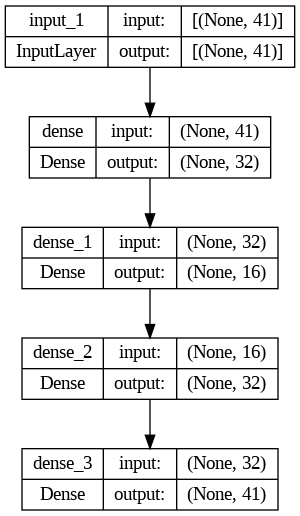

In [ ]:
from keras.utils import plot_model

plot_model(autoencoder_cluster_0, to_file='autoencoder_visualization.png', show_shapes=True, show_layer_names=True)

In [ ]:
autoencoder_cluster_0.metrics_names

[]

## cluster 0 training

In [ ]:
from keras.models import load_model
autoencoder_cluster_0 = load_model('/content/drive/MyDrive/Colab Notebooks/models/autoencoder-cluster-pair/autoencoder_cluster_new_0.h5')

In [ ]:
training_array_0 = np.array(train_clustered_df[0]).astype("float32")
# autoencoder_cluster_0.fit(training_array_0,training_array_0, epochs=50, batch_size=128, shuffle=True, validation_split=0.2, callbacks=[history_0])
ae_op_cluster_0 = autoencoder_cluster_0.predict(training_array_0)

218/218 [==============================] - 0s 1ms/step


In [ ]:
from keras.models import save_model

autoencoder_cluster_0.save('autoencoder_cluster_new_0.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
mse_cluster_0_train = np.mean(np.power(training_array_0 - ae_op_cluster_0, 2), axis=1)
np.average(mse_cluster_0_train)

0.00153152

In [ ]:
threshold_0 = np.mean(mse_normal_train) + np.std(mse_normal_train)
print("Threshold: ", threshold_0)

Threshold:  0.0013215435


## Cluster 1 training

In [ ]:
from keras.models import load_model

# Load the model from the file
autoencoder_cluster_1 = load_model('/content/drive/MyDrive/Colab Notebooks/models/autoencoder-cluster-pair/autoencoder_cluster_new_1.h5')

In [ ]:
training_array_1 = np.array(train_clustered_df[1]).astype("float32")
# autoencoder_cluster_1.fit(training_array_1,training_array_1, epochs=50, batch_size=128, shuffle=True, validation_split=0.2)
ae_op_cluster_1 = autoencoder_cluster_1.predict(training_array_1)

626/626 [==============================] - 1s 1ms/step


In [ ]:
from keras.models import save_model

autoencoder_cluster_1.save('autoencoder_cluster_new_1.h5')

In [ ]:
mse_cluster_1_train = np.mean(np.power(training_array_1 - ae_op_cluster_1, 2), axis=1)
np.average(mse_cluster_1_train)

0.00020496071

In [ ]:
threshold_1 = np.mean(mse_cluster_1_train) + np.std(mse_cluster_1_train)
print("Threshold: ", threshold_1)

Threshold:  0.0015400009


## cluster 2 training

In [ ]:
from keras.models import load_model

# Load the model from the file
autoencoder_cluster_2 = load_model('/content/drive/MyDrive/Colab Notebooks/models/autoencoder-cluster-pair/autoencoder_cluster_new_2.h5')

In [ ]:
training_array_2 = np.array(train_clustered_df[2]).astype("float32")
# autoencoder_cluster_2.fit(training_array_2,training_array_2, epochs=50, batch_size=128, shuffle=True, validation_split=0.2)
ae_op_cluster_2 = autoencoder_cluster_2.predict(training_array_2)

514/514 [==============================] - 1s 1ms/step


In [ ]:
from keras.models import save_model

autoencoder_cluster_2.save('autoencoder_cluster_new_2.h5')

In [ ]:
mse_cluster_2_train = np.mean(np.power(training_array_2 - ae_op_cluster_2, 2), axis=1)
np.average(mse_cluster_2_train)

0.00012456949

In [ ]:
threshold_2 = np.mean(mse_cluster_2_train) + np.std(mse_cluster_2_train)
print("Threshold: ", threshold_2)

Threshold:  0.0011320651


## cluster 3 training

In [ ]:
from keras.models import load_model

# Load the model from the file
autoencoder_cluster_3 = load_model('/content/drive/MyDrive/Colab Notebooks/models/autoencoder-cluster-pair/autoencoder_cluster_new_3.h5')

14

In [ ]:
training_array_3 = np.array(train_clustered_df[3]).astype("float32")
# autoencoder_cluster_3.fit(training_array_3,training_array_3, epochs=50, batch_size=128, shuffle=True, validation_split=0.2)
ae_op_cluster_3 = autoencoder_cluster_3.predict(training_array_3)

91/91 [==============================] - 0s 1ms/step


In [ ]:
from keras.models import save_model

autoencoder_cluster_3.save('autoencoder_cluster_new_3.h5')

In [ ]:
mse_cluster_3_train = np.mean(np.power(training_array_3 - ae_op_cluster_3, 2), axis=1)
np.average(mse_cluster_3_train)

0.0024089536

In [ ]:
threshold_3 = np.mean(mse_cluster_3_train) + np.std(mse_cluster_3_train)
print("Threshold: ", threshold_3)

Threshold:  0.008779396


## cluster 4 training

In [ ]:
from keras.models import load_model

# Load the model from the file
autoencoder_cluster_4 = load_model('/content/drive/MyDrive/Colab Notebooks/models/autoencoder-cluster-pair/autoencoder_cluster_new_4.h5')

In [ ]:
training_array_4 = np.array(train_clustered_df[4]).astype("float32")
# autoencoder_cluster_4.fit(training_array_4,training_array_4, epochs=50, batch_size=128, shuffle=True, validation_split=0.2)
ae_op_cluster_4 = autoencoder_cluster_4.predict(training_array_4)

354/354 [==============================] - 1s 2ms/step


In [ ]:
from keras.models import save_model

autoencoder_cluster_4.save('autoencoder_cluster_new_4.h5')

In [ ]:
mse_cluster_4_train = np.mean(np.power(training_array_4 - ae_op_cluster_4, 2), axis=1)
np.average(mse_cluster_4_train)

0.00061578624

In [ ]:
mse_cluster_4_train[:100]

array([1.02416612e-03, 5.91981807e-05, 5.67178213e-05, 6.67439454e-05,
       6.04471170e-05, 1.02824430e-04, 2.59503810e-04, 8.78756764e-05,
       1.28430896e-04, 2.81984394e-04, 1.29316526e-03, 5.19131310e-04,
       5.84829831e-04, 1.17956595e-04, 9.96440867e-05, 5.26209944e-04,
       2.41354015e-03, 4.74579429e-05, 4.87887504e-04, 2.59238062e-04,
       8.65726252e-05, 1.33718437e-04, 8.16038664e-05, 2.03256161e-04,
       2.81983113e-04, 2.11089573e-04, 3.52203606e-05, 8.59970169e-05,
       9.70297770e-05, 1.00678466e-04, 2.12746643e-04, 6.42217783e-05,
       6.13759737e-04, 9.64485516e-05, 1.33530470e-03, 3.67131215e-05,
       9.58662108e-03, 5.33061044e-04, 3.05946334e-04, 2.14026702e-04,
       6.01247593e-05, 1.13724818e-04, 2.69395503e-04, 2.13572726e-04,
       1.22814579e-03, 2.90307798e-04, 1.23560400e-04, 1.78793985e-02,
       1.22677675e-03, 2.05197299e-04, 5.39788016e-05, 6.04641449e-04,
       4.69258957e-05, 8.69631767e-05, 1.91585801e-04, 3.41140949e-05,
      

In [ ]:
threshold_4 = np.mean(mse_cluster_4_train) + np.std(mse_cluster_4_train)
print("Threshold: ", threshold_4)

Threshold:  0.002800185


## cluster 5 training

In [ ]:
from keras.models import load_model

# Load the model from the file
autoencoder_cluster_5 = load_model('/content/drive/MyDrive/Colab Notebooks/models/autoencoder-cluster-pair/autoencoder_cluster_new_5.h5')

In [ ]:
training_array_5 = np.array(train_clustered_df[5]).astype("float32")
# autoencoder_cluster_5.fit(training_array_5,training_array_5, epochs=50, batch_size=128, shuffle=True, validation_split=0.2)
ae_op_cluster_5 = autoencoder_cluster_5.predict(training_array_5)

295/295 [==============================] - 1s 2ms/step


In [ ]:
from keras.models import save_model

autoencoder_cluster_5.save('autoencoder_cluster_new_5.h5')

In [ ]:
len(ae_op_cluster_5[0])

41

In [ ]:
mse_cluster_5_train = np.mean(np.power(training_array_5 - ae_op_cluster_5, 2), axis=1)
np.average(mse_cluster_5_train)

0.00024124532

In [ ]:
threshold_5 = np.mean(mse_cluster_5_train) + np.std(mse_cluster_5_train)
print("Threshold: ", threshold_5)

Threshold:  0.0010305799


In [ ]:
threshold_arr = [threshold_0,threshold_1,threshold_2,threshold_3,threshold_4,threshold_5]
autoencoder_arr = [autoencoder_cluster_0,autoencoder_cluster_1,autoencoder_cluster_2,autoencoder_cluster_3,autoencoder_cluster_4,autoencoder_cluster_5]

In [ ]:
# def cluster_assignment(test_data):
#   test_data_arr = np.array(test_data).reshape(1,-1)
#   return kmeans.predict(test_data_arr)[0]

In [ ]:
def cluster_assignment_bulk(test_data):
  test_data_arr = np.array(test_data)
  return kmeans.predict(test_data_arr)

In [ ]:
def mse_loss(input_data, output_data):
    squared_diff = np.square(input_data - output_data)
    return np.mean(squared_diff)

In [ ]:
# def cluster_autoencoder_pair(X):
#   count_normal = 0
#   count_anomalous = 0
#   for i in range(len(X)):
#     cluster_no = cluster_assignment(X[i])
#     autoencoder_output = autoencoder_arr[cluster_no].predict(X[i].reshape(1,-1))
#     loss = mse_loss(X[i], autoencoder_output)
#     if( loss > threshold_arr[cluster_no]):
#       count_anomalous += 1
#     else:
#       count_normal += 1
#   return (count_anomalous,count_normal)

In [ ]:
arr = np.array([1,2,3,2,5])
val = 2
sec_arr = np.array([11,22,33,44,55])
sec_arr[arr==val]

array([22, 44])

In [ ]:
def cluster_autoencoder_pair_bulk(X):
    count_anomalous_ = 0
    count_normal_ = 0
    y_pred_ = list()
    cluster_no_arr = cluster_assignment_bulk(X)
    cluster_data_arrays = {}
    for cluster_value in np.unique(cluster_no_arr):
        cluster_data_arrays[cluster_value] = X[cluster_no_arr == cluster_value]
    autoencoder_output_arr = {}
    for i in np.unique(cluster_no_arr):
        autoencoder_output_arr[i] = autoencoder_arr[i].predict(cluster_data_arrays[i])
        # print(autoencoder_output_arr[i][:10])
        losses = np.mean(np.power(cluster_data_arrays[i] - autoencoder_output_arr[i], 2), axis=1)
        for loss in losses:
          if loss > threshold_ppf_arr[i]:
              count_anomalous_ += 1
              y_pred_.append(1)
          else:
              count_normal_ += 1
              y_pred_.append(0)
    return count_anomalous_, count_normal_, y_pred_

In [ ]:
# threshold_ppf_arr = np.array(threshold_best_arr) * 0.52

In [ ]:
t = cluster_assignment_bulk(x_test)
for i in np.unique(t):
  print(len(x_test[t == i]))

46459
5013
5020
17059
2656
5256


In [ ]:
actual_normal_count_anomalous, actual_normal_count_normal, actual_normal_y_pred = cluster_autoencoder_pair_bulk(normal_test)

49/49 [==============================] - 0s 2ms/step


In [ ]:
actual_normal_count_anomalous, actual_normal_count_normal

(1706, 8294)

In [ ]:
actual_anomalous_count_anomalous, actual_anomalous_count_normal, actual_anomalous_y_pred = cluster_autoencoder_pair_bulk(anomalous_test)

117/117 [==============================] - 0s 2ms/step


In [ ]:
actual_anomalous_count_anomalous, actual_anomalous_count_normal,

(68923, 2540)

In [ ]:
count_anomalous, count_normal, y_pred = cluster_autoencoder_pair_bulk(x_test)

165/165 [==============================] - 0s 2ms/step


In [ ]:
count_anomalous, count_normal

(70629, 10834)

In [ ]:
y = kmeans.predict(x_test)

test_df['Cluster_6'] = y

test_df.head(3)

duration protocol_type   service flag src_bytes dst_bytes land  \
0      0.0           1.0  0.173913  0.9       0.0       0.0    0   
1      0.0           0.5  0.289855  0.9  0.000001       0.0    0   
2      0.0           0.5  0.347826  0.9       0.0   0.00001    0   

  wrong_fragment urgent  hot num_failed_logins logged_in num_compromised  \
0              0    0.0  0.0               0.0         0             0.0   
1              0    0.0  0.0               0.0         1             0.0   
2              0    0.0  0.0               0.0         1             0.0   

  root_shell su_attempted num_root num_file_creations num_shells  \
0          0          0.0      0.0                0.0        0.0   
1          0          0.0      0.0                0.0        0.0   
2          0          0.0      0.0                0.0        0.0   

  num_access_files num_outbound_cmds is_host_login is_guest_login     count  \
0              0.0                 0             0              0  0.209393   
1              0.0                 0             0              0  0.003914   
2              0.0                 0             0              0   0.04501   

  srv_count serror_rate srv_serror_rate rerror_rate srv_rerror_rate  \
0  0.209393         0.0             0.0         0.0             0.0   
1  0.003914         0.0             0.0         0.0             0.0   
2  0.046967         0.0             0.0         0.0             0.0   

  same_srv_rate diff_srv_rate srv_diff_host_rate dst_host_count  \
0           1.0           0.0                0.0            1.0   
1           1.0           0.0                0.0            1.0   
2           1.0           0.0               0.08            1.0   

  dst_host_srv_count dst_host_same_srv_rate dst_host_diff_srv_rate  \
0           0.784314                   0.78                   0.01   
1           0.580392                   0.58                   0.03   
2                1.0                    1.0                    0.0   

  dst_host_same_src_port_rate dst_host_srv_diff_host_rate  \
0                         0.0                         0.0   
1                        0.59                         0.0   
2                         0.0                         0.0   

  dst_host_serror_rate dst_host_srv_serror_rate dst_host_rerror_rate  \
0                  0.0                      0.0                  0.0   
1                  0.0                     0.01                  0.0   
2                  0.0                      0.0                  0.0   

  dst_host_srv_rerror_rate   label  Cluster_6  
0                      0.0  normal          5  
1                      0.0  normal          4  
2                      0.0  normal          2

In [ ]:
y_true_ = []

for cluster_value in range(6):
    cluster_df = test_df[test_df['Cluster_6'] == cluster_value]
    y = np.where(cluster_df['label'] == 'normal', 0, 1)
    y_true_.extend(y)

# Result: Using CAEP (Label-encoded)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_true_, y_pred)

print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_true_, y_pred))

Confusion Matrix:
[[ 8294  1706]
 [ 2540 68923]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80     10000
           1       0.98      0.96      0.97     71463

    accuracy                           0.95     81463
   macro avg       0.87      0.90      0.88     81463
weighted avg       0.95      0.95      0.95     81463



In [ ]:
# import numpy as np
# from scipy.stats import norm

# best_accuracy = 0
# best_threshold_arr = []

# for i in range(96,91,-1):
#   for j in range(96,91,-1):
#     for k in range(96,91,-1):
#       for l in range(96,91,-1):
#         for m in range(96,91,-1):
#           for n in range(96,91,-1):

#             mu_0, sigma_0 = norm.fit(mse_cluster_0_train)
#             threshold_ppf_0 = norm.ppf(i/100, loc=mu_0, scale=sigma_0)
#             mu_1, sigma_1 = norm.fit(mse_cluster_1_train)
#             threshold_ppf_1 = norm.ppf(j/100, loc=mu_1, scale=sigma_1)
#             mu_2, sigma_2 = norm.fit(mse_cluster_2_train)
#             threshold_ppf_2 = norm.ppf(k/100, loc=mu_2, scale=sigma_2)
#             mu_3, sigma_3 = norm.fit(mse_cluster_3_train)
#             threshold_ppf_3 = norm.ppf(l/100, loc=mu_3, scale=sigma_3)
#             mu_4, sigma_4 = norm.fit(mse_cluster_4_train)
#             threshold_ppf_4 = norm.ppf(m/100, loc=mu_4, scale=sigma_4)
#             mu_5, sigma_5 = norm.fit(mse_cluster_5_train)
#             threshold_ppf_5 = norm.ppf(n/100, loc=mu_5, scale=sigma_5)

#             threshold_ppf_arr = [threshold_ppf_0,threshold_ppf_1,threshold_ppf_2,threshold_ppf_3,threshold_ppf_4,threshold_ppf_5]

#             actual_normal_count_anomalous, actual_normal_count_normal, actual_normal_y_pred = cluster_autoencoder_pair_bulk(normal_test)
#             actual_anomalous_count_anomalous, actual_anomalous_count_normal, actual_anomalous_y_pred = cluster_autoencoder_pair_bulk(anomalous_test)

#             tp = actual_anomalous_count_anomalous
#             tn = actual_normal_count_normal
#             fp = actual_normal_count_anomalous
#             fn = actual_anomalous_count_normal

#             accuracy = (tp + tn) / (tp + tn + fp + fn)

#             if(accuracy > best_accuracy):
#               print(f"{i} {j} {k} {l} {m} {n}")
#               print(f"best acc = {best_accuracy}")
#               best_accuracy = accuracy
#               best_threshold_arr = threshold_ppf_arr
#               print(f"best acc = {best_accuracy}")

# print(best_accuracy)
# print(best_threshold_arr)

In [ ]:
threshold_arr

[0.0013215435,
 0.0015400009,
 0.0011320651,
 0.008779396,
 0.002800185,
 0.0010305799]

In [ ]:
for i in np.linspace(0.95,1.05,num=20):
  threshold_ppf_arr = np.array([1,2,3]) * i
  print(threshold_ppf_arr)

[0.95 1.9  2.85]
[0.95526316 1.91052632 2.86578947]
[0.96052632 1.92105263 2.88157895]
[0.96578947 1.93157895 2.89736842]
[0.97105263 1.94210526 2.91315789]
[0.97631579 1.95263158 2.92894737]
[0.98157895 1.96315789 2.94473684]
[0.98684211 1.97368421 2.96052632]
[0.99210526 1.98421053 2.97631579]
[0.99736842 1.99473684 2.99210526]
[1.00263158 2.00526316 3.00789474]
[1.00789474 2.01578947 3.02368421]
[1.01315789 2.02631579 3.03947368]
[1.01842105 2.03684211 3.05526316]
[1.02368421 2.04736842 3.07105263]
[1.02894737 2.05789474 3.08684211]
[1.03421053 2.06842105 3.10263158]
[1.03947368 2.07894737 3.11842105]
[1.04473684 2.08947368 3.13421053]
[1.05 2.1  3.15]


In [ ]:
# mu_0, sigma_0 = norm.fit(mse_cluster_0_train)
# threshold_ppf_0 = norm.ppf(90/100, loc=mu_0, scale=sigma_0)
# mu_1, sigma_1 = norm.fit(mse_cluster_1_train)
# threshold_ppf_1 = norm.ppf(90/100, loc=mu_1, scale=sigma_1)
# mu_2, sigma_2 = norm.fit(mse_cluster_2_train)
# threshold_ppf_2 = norm.ppf(90/100, loc=mu_2, scale=sigma_2)
# mu_3, sigma_3 = norm.fit(mse_cluster_3_train)
# threshold_ppf_3 = norm.ppf(90/100, loc=mu_3, scale=sigma_3)
# mu_4, sigma_4 = norm.fit(mse_cluster_4_train)
# threshold_ppf_4 = norm.ppf(90/100, loc=mu_4, scale=sigma_4)
# mu_5, sigma_5 = norm.fit(mse_cluster_5_train)
# threshold_ppf_5 = norm.ppf(90/100, loc=mu_5, scale=sigma_5)

# threshold_ppf_arr = [threshold_ppf_0,threshold_ppf_1,threshold_ppf_2,threshold_ppf_3,threshold_ppf_4,threshold_ppf_5]
threshold_best_arr = [0.0003215435, 0.00054, 0.0001320651, 0.007779396, 0.001800185, 0.0015305799]
# threshold_ppf_arr = threshold_arr
for i in np.linspace(0.51,0.54,num=10):
  threshold_ppf_arr = np.array(threshold_best_arr) * i
  actual_normal_count_anomalous, actual_normal_count_normal, actual_normal_y_pred = cluster_autoencoder_pair_bulk(normal_test)
  actual_anomalous_count_anomalous, actual_anomalous_count_normal, actual_anomalous_y_pred = cluster_autoencoder_pair_bulk(anomalous_test)

  tp = actual_anomalous_count_anomalous
  tn = actual_normal_count_normal
  fp = actual_normal_count_anomalous
  fn = actual_anomalous_count_normal

  accuracy = (tp + tn) / (tp + tn + fp + fn)

  print(accuracy)
  print(f"i={i}\nacc= {accuracy}")

117/117 [==============================] - 0s 2ms/step
0.947816800265151
i=0.51
acc= 0.947816800265151
117/117 [==============================] - 0s 2ms/step
0.947816800265151
i=0.5133333333333333
acc= 0.947816800265151
117/117 [==============================] - 0s 1ms/step
0.9478781778230608
i=0.5166666666666667
acc= 0.9478781778230608
117/117 [==============================] - 0s 2ms/step
0.9478781778230608
i=0.52
acc= 0.9478781778230608
117/117 [==============================] - 0s 2ms/step
0.9478781778230608
i=0.5233333333333333
acc= 0.9478781778230608
117/117 [==============================] - 0s 2ms/step
0.947829075776733
i=0.5266666666666667
acc= 0.947829075776733
117/117 [==============================] - 0s 2ms/step
0.9477308716840774
i=0.53
acc= 0.9477308716840774
117/117 [==============================] - 0s 2ms/step
0.9477185961724955
i=0.5333333333333333
acc= 0.9477185961724955
117/117 [==============================] - 0s 1ms/step
0.9477554227072413
i=0.5366666666666667
a

In [ ]:
best_accuracy = 0
best_multiplier = 0
for i in np.linspace(0.0, 1.2, num=10):
  threshold_ppf_arr = []
  threshold_0 = np.mean(mse_cluster_0_train) + (i * np.std(mse_cluster_0_train))
  threshold_1 = np.mean(mse_cluster_1_train) + (i * np.std(mse_cluster_1_train))
  threshold_2 = np.mean(mse_cluster_2_train) + (i * np.std(mse_cluster_2_train))
  threshold_3 = np.mean(mse_cluster_3_train) + (i * np.std(mse_cluster_3_train))
  threshold_4 = np.mean(mse_cluster_4_train) + (i * np.std(mse_cluster_4_train))
  threshold_5 = np.mean(mse_cluster_5_train) + (i * np.std(mse_cluster_5_train))
  threshold_ppf_arr = [threshold_0, threshold_1, threshold_2, threshold_3, threshold_4, threshold_5 ]

  actual_normal_count_anomalous, actual_normal_count_normal, actual_normal_y_pred = cluster_autoencoder_pair_bulk(normal_test)
  actual_anomalous_count_anomalous, actual_anomalous_count_normal, actual_anomalous_y_pred = cluster_autoencoder_pair_bulk(anomalous_test)

  tp = actual_anomalous_count_anomalous
  tn = actual_normal_count_normal
  fp = actual_normal_count_anomalous
  fn = actual_anomalous_count_normal

  accuracy = (tp + tn) / (tp + tn + fp + fn)
  print(f"multiplier = {i} \n{threshold_ppf_arr}")
  print(f"acc = {accuracy}")
  if(accuracy > best_accuracy):
    best_accuracy = accuracy
    best_multiplier = i

print(best_accuracy)
print(best_multiplier)

117/117 [==============================] - 0s 2ms/step
multiplier = 0.0 
[0.0015315200434997678, 0.00020496071374509484, 0.00012456948752515018, 0.0024089536163955927, 0.0006157862371765077, 0.00024124531773850322]
acc = 0.9360323091464837
117/117 [==============================] - 0s 1ms/step
multiplier = 0.13333333333333333 
[0.0020709200374161205, 0.00038296607381198554, 0.0002589022294462969, 0.0032583460056533416, 0.0009070393978618085, 0.0003464899375103414]
acc = 0.9268256754600248
117/117 [==============================] - 0s 1ms/step
multiplier = 0.26666666666666666 
[0.0026103200313324732, 0.0005609714338788762, 0.0003932349713674436, 0.0041077383949110905, 0.0011982925585471093, 0.00045173455728217957]
acc = 0.9198777359046438
117/117 [==============================] - 0s 2ms/step
multiplier = 0.4 
[0.0031497200252488256, 0.000738976793945767, 0.0005275677132885904, 0.00495713078416884, 0.0014895457192324103, 0.0005569791770540178]
acc = 0.9170052661944686
117/117 [=========

In [ ]:
threshold_arr = [0.0013215435, 0.0015400009, 0.0011320651, 0.008779396, 0.002800185, 0.0010305799]
threshold_comb_arr = []
adjustment_range = 0.001
for i in threshold_arr:
  arr = []
  for adjustment in np.linspace(-adjustment_range, adjustment_range, num=5):
    arr += [adjustment + i]
  threshold_comb_arr += [arr]
print(threshold_comb_arr)

In [ ]:
best_accuracy = 0
best_threshold = []

for i in threshold_comb_arr[0]:
  for j in threshold_comb_arr[1]:
    for k in threshold_comb_arr[2]:
      for l in threshold_comb_arr[3]:
        for m in threshold_comb_arr[4]:
          for n in threshold_comb_arr[5]:
            threshold_ppf_arr = [i,j,k,l,m,n]

            actual_normal_count_anomalous, actual_normal_count_normal, actual_normal_y_pred = cluster_autoencoder_pair_bulk(normal_test)
            actual_anomalous_count_anomalous, actual_anomalous_count_normal, actual_anomalous_y_pred = cluster_autoencoder_pair_bulk(anomalous_test)

            tp = actual_anomalous_count_anomalous
            tn = actual_normal_count_normal
            fp = actual_normal_count_anomalous
            fn = actual_anomalous_count_normal

            accuracy = (tp + tn) / (tp + tn + fp + fn)
            print(f"{i} {j} {k} {l} {m} {n}")
            print(f"accuracy = {accuracy}")
            print(f"best acc = {best_accuracy}")

            if accuracy > best_accuracy:
              best_accuracy = accuracy
              print(f"#########*****#######BEST ACCURACY = {best_accuracy}")
              best_threshold = threshold_ppf_arr

print(best_accuracy)
print(best_threshold)

In [ ]:
print(best_accuracy)
print(best_threshold)

In [ ]:
threshold_arr

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))
group_names = ["TN","FP","FN","TP"]
group_counts = [f"{value:0.0f}" for value in cm.flatten()]
# group_percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')